### Data Description

This dataset contains synthetic data simulating customer behavior for a Netflix-like video streaming service. It includes 5,000 records with 14 carefully engineered features designed for churn prediction modeling, business insights, and customer segmentation.

#### Dataset Columns

| Column                 | Description                                       |
| --------------------- | ------------------------------------------------ |
| customer_id          | Unique identifier for each customer.              |
| age                  | Age of the customer.                              |
| gender               | Gender of the customer.                           |
| subscription_type    | Type of Netflix subscription (e.g., Basic, Standard, Premium). |
| watch_hours          | Total hours the customer watched content.         |
| last_login_days      | Number of days since the customer's last login.   |
| region               | Geographical region of the customer.              |
| device               | Primary device used by the customer to watch Netflix. |
| monthly_fee          | Monthly subscription fee paid by the customer.    |
| churned              | Indicates if the customer churned (1) or not (0). |
| payment_method       | Payment method used by the customer.              |
| number_of_profiles   | Number of profiles associated with the account.   |
| avg_watch_time_per_day | Average daily watch time in hours.                |
| favorite_genre       | Customer's most frequently watched genre.         |

#### Data Source

The data was sourced from Kaggle open dataset [Netflix Customer Churn - Abdul Wadood](https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset/data)  

In [457]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [458]:
# set styling
from matplotlib import rcParams

plt.style.use("seaborn-v0_8-darkgrid")

# set title style
rcParams["axes.titlesize"] = 9
rcParams["axes.titlepad"] = 20
rcParams["axes.titleweight"] = "bold"

# set label style
rcParams["axes.labelsize"] = 9
rcParams["axes.labelpad"] = 20
rcParams["axes.labelweight"] = "bold"

# set tick style
rcParams["xtick.labelsize"] = 9
rcParams["ytick.labelsize"] = 9

# set text fontsize and legend fontsize
rcParams["font.size"] = 9
rcParams["legend.fontsize"] = 9

# set export dpi
rcParams["savefig.dpi"] = 200

In [459]:
# bypass warning
import warnings

warnings.filterwarnings("ignore")

In [460]:
# set directory
cdir = os.getcwd()

# set input
data = os.path.join(cdir, "data")
output = os.path.join(cdir, "output")
filepath = os.path.join(data, "netflix_customer_churn.csv")

# set output folder
os.makedirs(output, exist_ok=True)

# read data
raw = pd.read_csv(filepath)
raw.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [461]:
# columns
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre',
       'engagement_score'],
      dtype='object')

### Data Cleaning

In this section, we performed data cleaning steps that included checking for missing values, addressing duplicate values, discretizing categorical variables, normalizing numerical variables, and removing columns not used for analysis.

In [462]:
df = raw.copy()

In [463]:
# check missing values
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [464]:
# check duplicate data
df.duplicated().sum()

0

In [465]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [466]:
# change churned column from int64 to boolean
df["churned"] = df["churned"].astype(bool)

# remove customer_id column
df = df.drop("customer_id", axis=1)

In [467]:
# display dataset
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,True,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,True,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,False,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,True,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,True,Crypto,2,0.13,Action


In [ ]:
# export clean data
df.to_csv(os.path.join(data, "netflix_customer_churn_clean.csv"), index=False)

#### Summary

Our initial data inspection revealed no missing values or duplicate entries in the dataset. For analysis, we transformed the `churned` column from int64 to boolean type and subsequently dropped the `customer_id` column, as it was not relevant for our modeling purposes.

### Exploratory Data Analysis

This section involves analyzing the dataset to summarize its main characteristics, often with visual methods. We will explore patterns, detect anomalies, test hypotheses, and check assumptions with the help of various plots and statistical summaries.

In [469]:
# check data description
df.describe()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,5.000000,98.420000


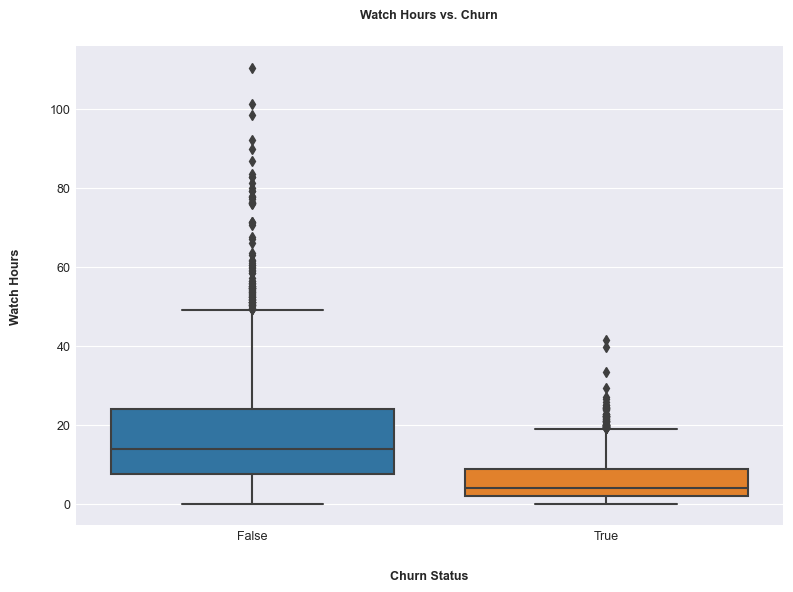

In [470]:
# watch hours vs churn chart
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="churned", y="watch_hours", data=df, ax=ax)

# set plot detail
ax.set_xlabel("Churn Status")
ax.set_ylabel("Watch Hours")
ax.set_title("Watch Hours vs. Churn")

plt.tight_layout()
plt.savefig(os.path.join(output, "watch_hours_vs_churn.png"))
plt.show()

This shows if churned users watch less content. Initial hypothesis is users with lower watch hours are more likely to churn, signaling disengagement. we can see from the plot above that the hypothesis is supported by the data.

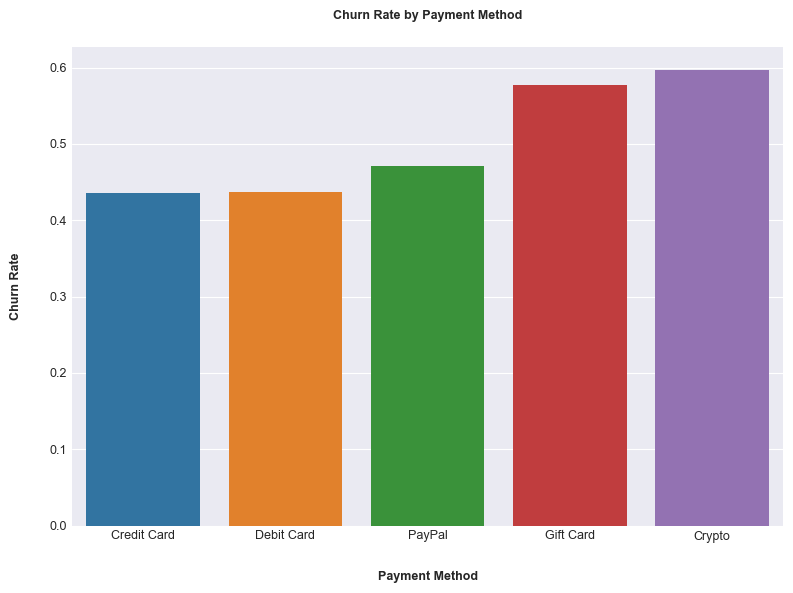

In [471]:
# churn rate by payment method
fig, ax = plt.subplots(figsize=(8, 6))
churn_by_payment = df.groupby("payment_method")["churned"].mean().sort_values()
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, ax=ax)

# set plot detail
ax.set_xlabel("Payment Method")
ax.set_ylabel("Churn Rate")
ax.set_title("Churn Rate by Payment Method")

plt.tight_layout()
plt.savefig(os.path.join(output, "churn_by_payment_method.png"))
plt.show()

This chart shows the average churn rate per payment method. Gift card and crypto has a higher churn rate, it may indicate friction or lack of customer commitment. Netflix could consider incentivizing automatic payments to reduce churn, credit card has the lowest churn rate among all payment methods.

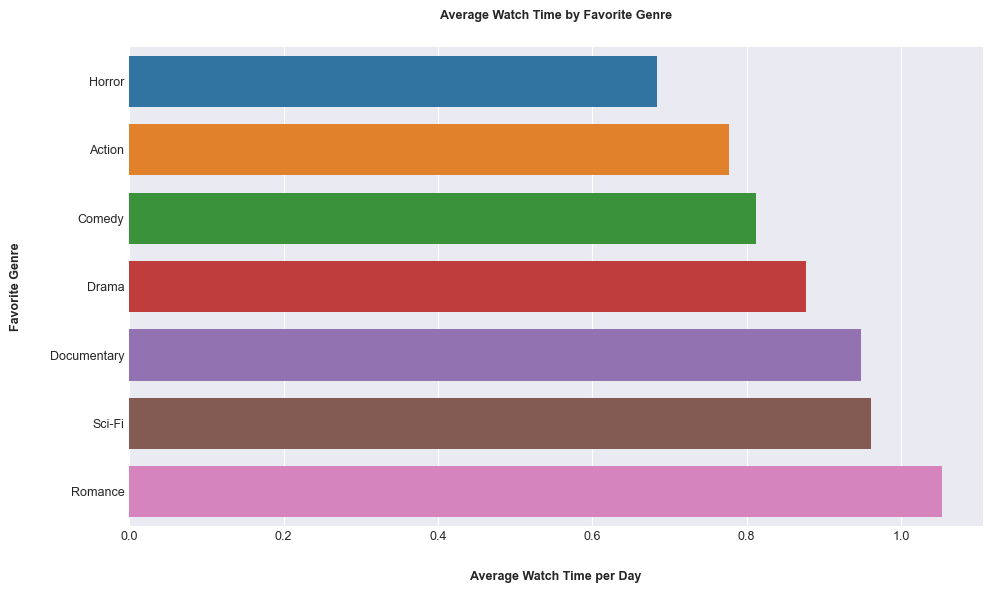

In [472]:
# avg watch time per day by favorite genre
fig, ax = plt.subplots(figsize=(10, 6))
group = df.groupby("favorite_genre")["avg_watch_time_per_day"].mean().sort_values()
sns.barplot(x=group.values, y=group.index, ax=ax, width=0.75)

# set plot detail
ax.set_xlabel("Average Watch Time per Day")
ax.set_ylabel("Favorite Genre")
ax.set_title("Average Watch Time by Favorite Genre")

plt.tight_layout()
plt.savefig(os.path.join(output, "avg_watch_time_by_genre.png"))
plt.show()

Genres with high avg watch time can be used for content investment strategies. In this case, Romance or Sci-Fi leads to higher watch time, Netflix should produce or recommend more content in those genres, or in another perspective, lower watch time genres like Horror and Action can be a new opportunity to produce a better content strategy.

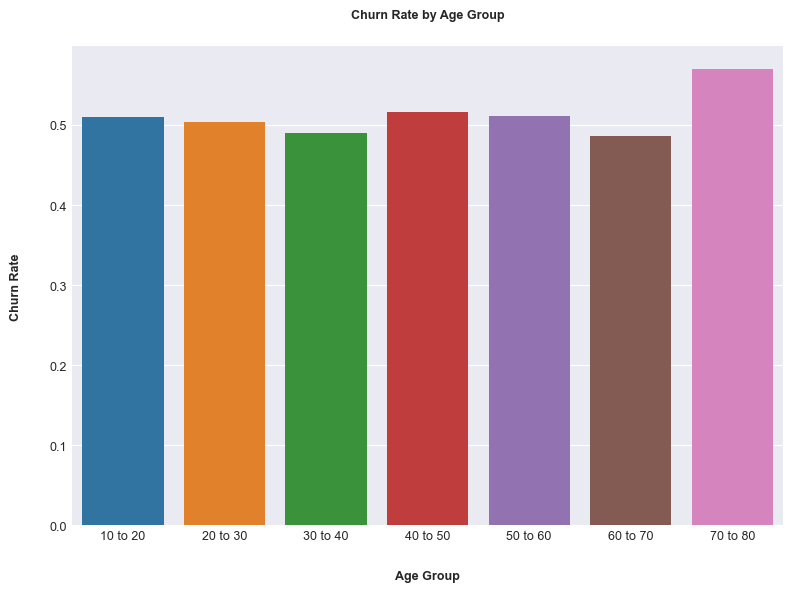

In [473]:
# create age groups
bins = range(10, 81, 10)
labels = [f"{age} to {age + 10}" for age in bins[:-1]]
group = df.copy()
group["group"] = pd.cut(group["age"], bins=bins, labels=labels, right=False)

# churn rate by age group
fig, ax = plt.subplots(figsize=(8, 6))
churn_by_age = group.groupby("group")["churned"].mean()
sns.barplot(x=churn_by_age.index, y=churn_by_age.values, ax=ax)

# set plot detail
ax.set_xlabel("Age Group")
ax.set_ylabel("Churn Rate")
ax.set_title("Churn Rate by Age Group")

plt.tight_layout()
plt.savefig(os.path.join(output, "churn_by_age_group.png"))
plt.show()

Wen can learn which age groups have higher customer lifetime risk. we can see in the plot that 70 – 80 yo group churns the most, consider re-engagement campaigns or improved UX for that segment. The group with the lowest churn rate is the 30 - 40 yo group meaning that this group has the highest satisfaction with Netflix service.

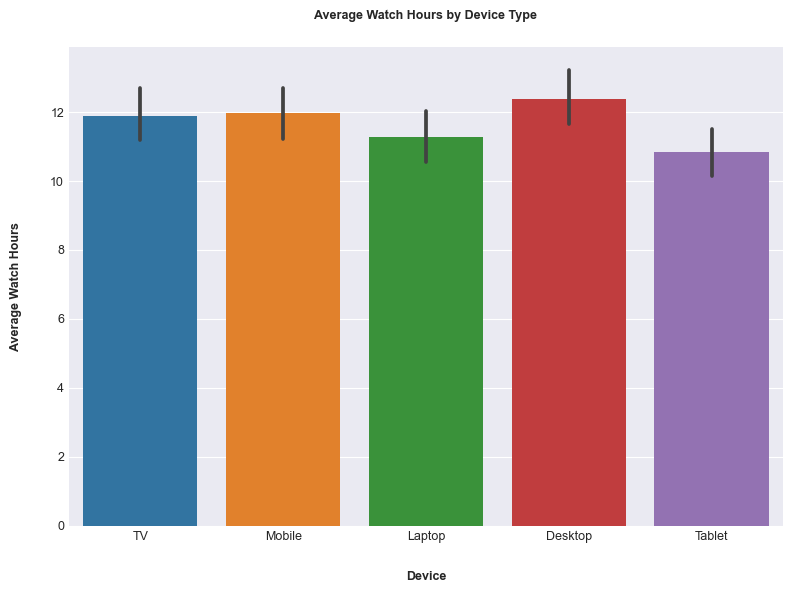

In [474]:
# avg watch hours by device
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="device", y="watch_hours", data=df, estimator="mean", ax=ax)

# set plot detail
ax.set_xlabel("Device")
ax.set_ylabel("Average Watch Hours")
ax.set_title("Average Watch Hours by Device Type")

plt.tight_layout()
plt.savefig(os.path.join(output, "watch_hours_by_device.png"))
plt.show()

Reveals which devices lead to higher engagement. In this dataset we can see Laptop and Tablet user yield shorter watch hours than other devices, this could be due to the fact that UX for these devices is not as good as other devices, Netflix could improve the UX of these devices to increase the number of users watching content.

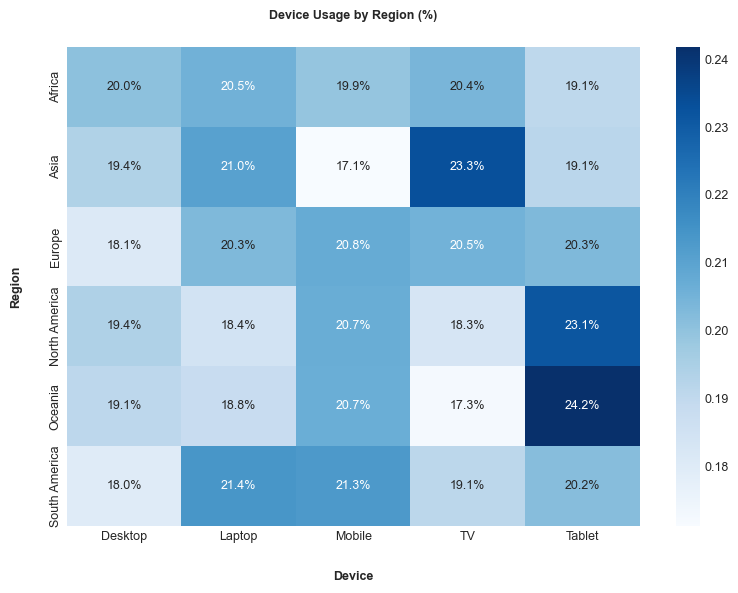

In [475]:
# heatmap of region vs device
device_region = pd.crosstab(df["region"], df["device"], normalize="index")

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(device_region, annot=True, fmt=".1%", cmap="Blues", ax=ax)

# set plot detail
ax.set_title("Device Usage by Region (%)")
ax.set_xlabel("Device")
ax.set_ylabel("Region")

plt.tight_layout()
plt.savefig(os.path.join(output, "device_usage_by_region.png"))
plt.show()

This plot shows regional device preferences. Useful for regional campaigns and platform optimization, for example we can see in Oceania and North America, Tablet is preferred over other devices, and in Asia mobile is less preferred than other devices while TV has the highest preference.

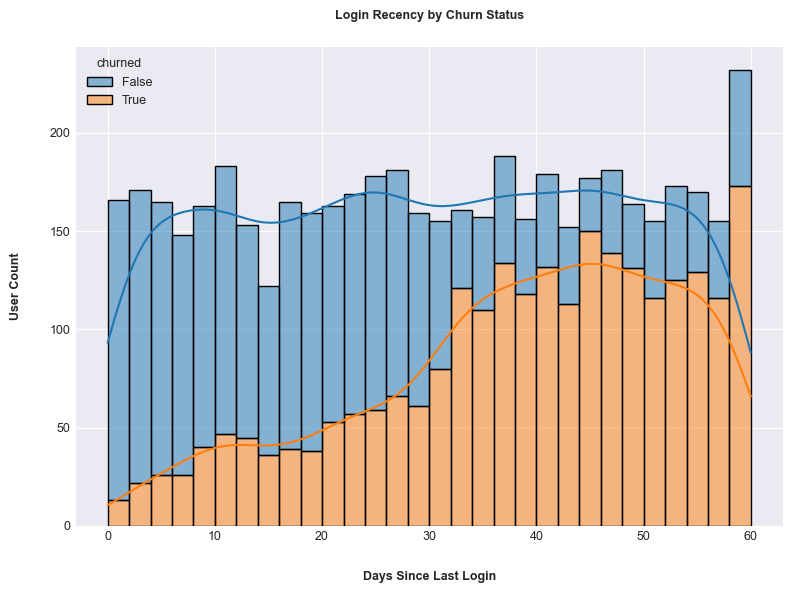

In [476]:
# histogram of last login days by churn status
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(
    data=df,
    x="last_login_days",
    hue="churned",
    bins=30,
    kde=True,
    multiple="stack",
    ax=ax,
)

# set plot detail
ax.set_xlabel("Days Since Last Login")
ax.set_ylabel("User Count")
ax.set_title("Login Recency by Churn Status")

plt.tight_layout()
plt.savefig(os.path.join(output, "login_recency_by_churn.png"))
plt.show()

The plot above shows whether users who haven’t logged in recently are more likely to churn. Expect to see churned users clustered on higher login days, which can be a leading indicator of churn, Netflix should improve their customer engagement and retention strategies.